<a href="https://colab.research.google.com/github/augnoel/noel/blob/develop/standardA_clustering_ans3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. 패키지 호출

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. 덴드로이드 실습

In [ ]:
#music dataset 불러오기
df_bts = pd.read_csv("/content/drive/MyDrive/nbcamp_data/Spotify_BTS_AudioFeatures.csv") #Google Drive의 파일 경로를 잘 확인해주세요.

In [ ]:
df_bts.head()

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


In [ ]:
#데이터 전처리

#1. 칼럼 성격에 따라 info용 DataFrame과 분석용 DataFrame으로 분리
df_bts_info = df_bts[["Title",	"Artist",	"Release"]]
df_bts_anal = df_bts.drop(["Unnamed: 0", "Title",	"Artist",	"Release", "key",	"id"], axis = 1)

#2. 분석용 DataFrame 스케일링 진행
scaler = StandardScaler()
df_bts_anal_s = pd.DataFrame(data = scaler.fit_transform(df_bts_anal), columns = df_bts_anal.columns)
df_bts_anal_s["duration"] = df_bts_anal_s["duration_ms"]
df_bts_anal_s = df_bts_anal_s.drop(["duration_ms"], axis = 1)

In [ ]:
df_bts_anal_s.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,-0.387776,-0.279935,-1.533436,0.329929,-1.123182,-0.090282,1.245994,-0.147170,0.233761,1.198595,-0.756189,0.003835
1,-1.745654,0.747749,-0.975478,-0.271117,0.890327,2.904543,-0.643637,-0.141153,2.051508,0.371794,1.683076,-0.300891
2,1.211917,1.344238,0.698397,-0.232650,-1.123182,0.220978,-0.665193,-0.123590,-0.024944,1.728596,0.823738,-0.189335
3,0.914300,1.408917,1.535334,1.307231,-1.123182,1.179995,0.749108,-0.147170,-0.487891,0.721594,-0.119667,0.456246
4,0.263262,0.208754,-1.533436,-1.130613,0.890327,-0.261054,-0.675204,-0.147170,0.717132,0.016693,-1.060753,0.879516


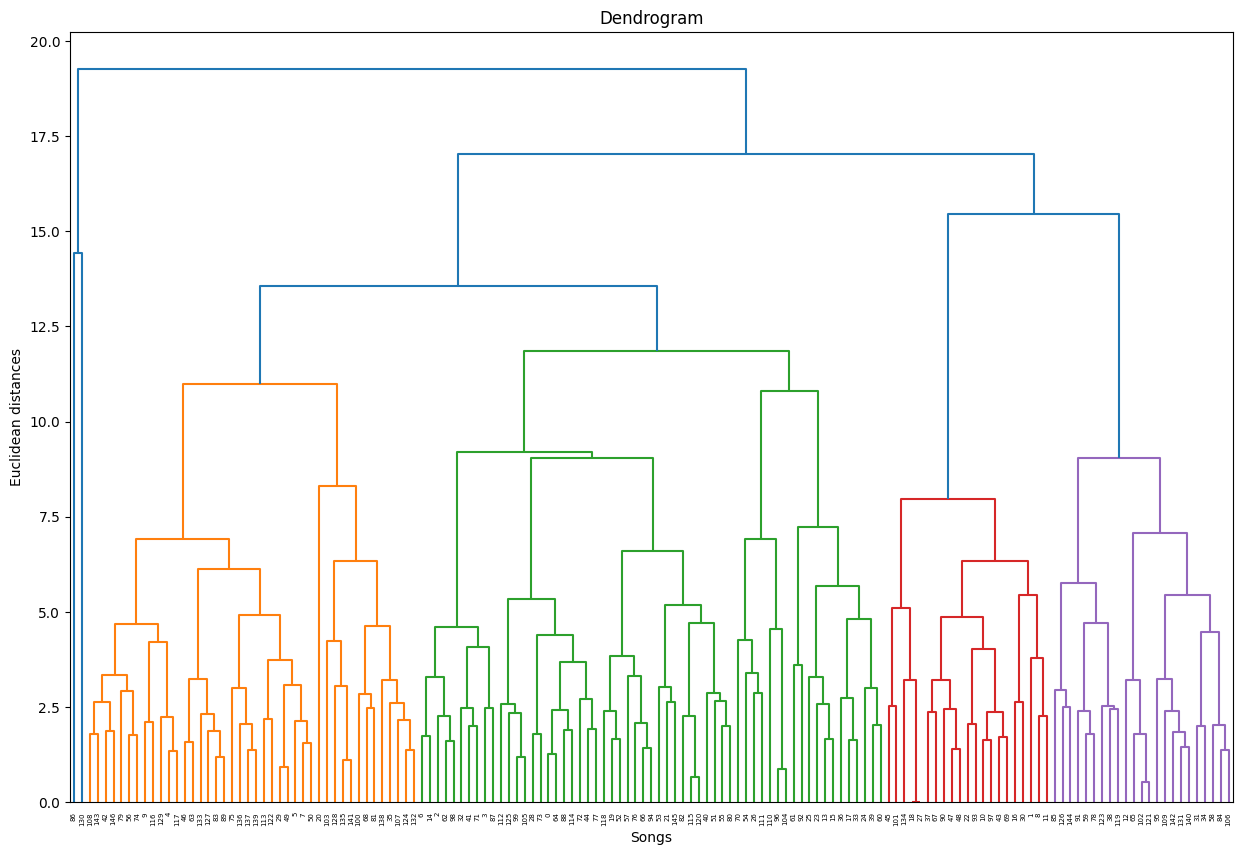

In [ ]:
#덴드로그램 작성
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean distances')
dgram = dendrogram(linkage(df_bts_anal_s, method = 'ward'))
plt.show()


In [ ]:
def get_song_info(idx):
  return "{}".format(df_bts_info.iloc[idx]["Title"])

get_song_info(86)

'Singularity'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36681 (\N{CJK UNIFIED IDEOGRAPH-8F49}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46400 (\N{HANGUL SYLLABLE DDAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45576 (\N{HANGUL SYLLABLE NUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pa

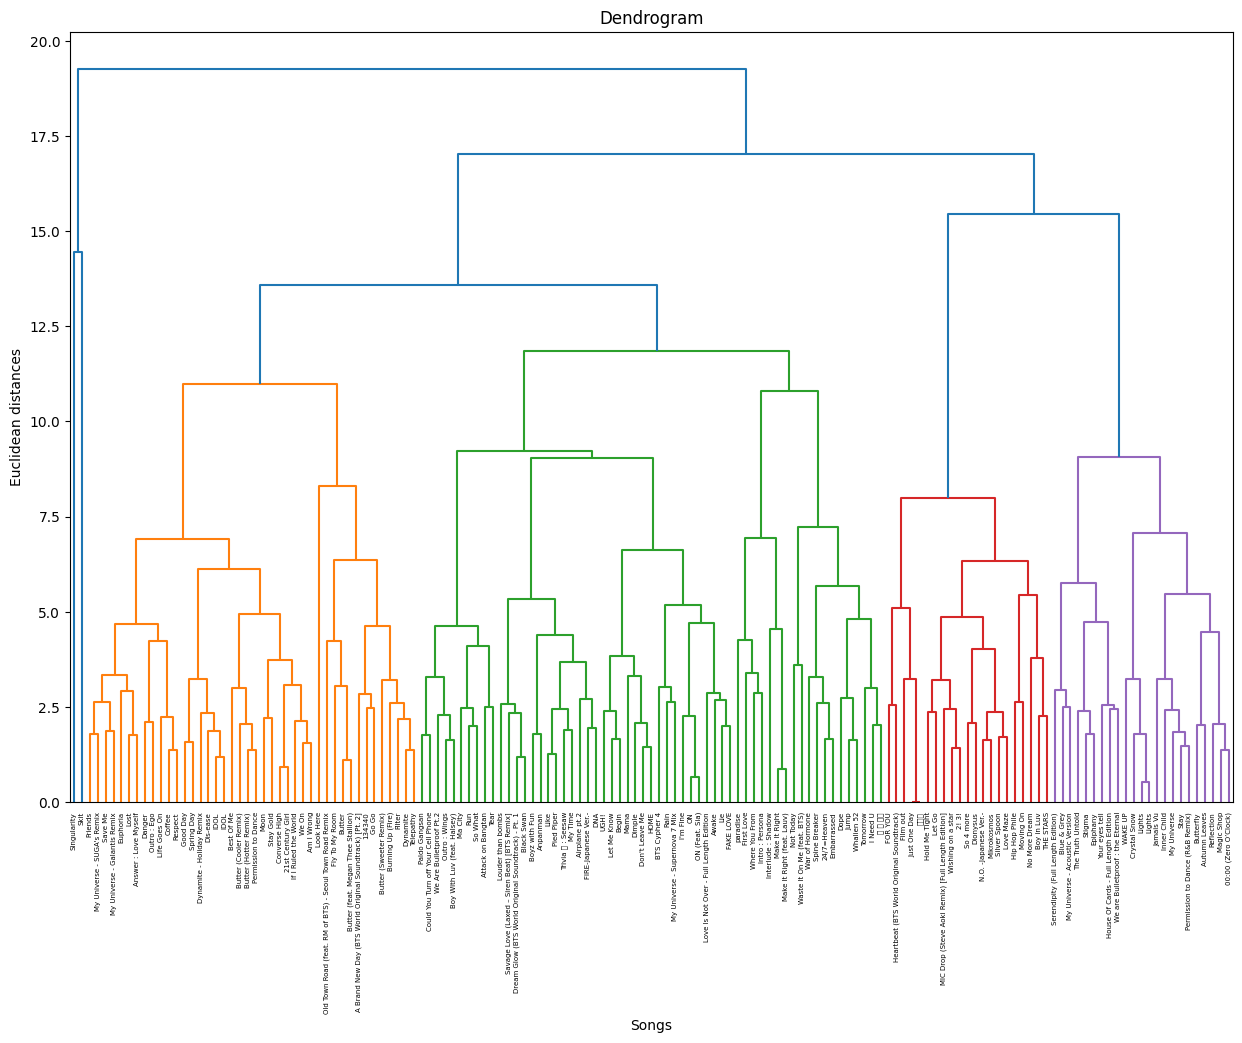

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean distances')
dgram = dendrogram(linkage(df_bts_anal_s, method = 'ward'), leaf_label_func = get_song_info)
plt.show()

## 2. 계층적 군집화 실습

In [ ]:
#계층적 군집화 실행
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
h_clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
h_label = h_clustering.fit_predict(df_bts_anal_s)
h_label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 3,
       0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 4, 0,
       0, 0, 3, 1, 0, 3, 0, 1, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
def print_cluster_result(n_clusters, affinity = 'euclidean', linkage = 'ward'):
  global df_bts_info
  h_clustering = AgglomerativeClustering(n_clusters = n_clusters, linkage = linkage,\
                                         affinity = affinity)
  h_label = h_clustering.fit_predict(df_bts_anal_s)
  df_bts_info["cluster"] = h_label
  for i in range(0, n_clusters):
    print("Cluster {}".format(i))
    print("-----------------------")
    df_print = df_bts_info[df_bts_info["cluster"] == i]
    df_print_list = df_print["Title"].sort_values(ascending = True).tolist()
    print("\n".join(df_print_list))
    print("-----------------------\n")
  df_bts_info = df_bts_info.drop(["cluster"], axis = 1)

In [ ]:
print_cluster_result(n_clusters = 6)

Cluster 0
-----------------------
24/7=Heaven
Airplane pt.2
Anpanman
Attack on Bangtan
Awake
BTS Cypher 4
Begin
Black Swan
Boy With Luv (feat. Halsey)
Boyz with Fun
Could You Turn off Your Cell Phone
DNA
Dimple
Don't Leave Me
Dope
Dream Glow (BTS World Original Soundtrack) - Pt. 1
Embarrassed
FAKE LOVE
FIRE-Japanese Ver.-
First Love
HOME
I Need U
I'm Fine
Interlude : Shadow
Intro : Persona
Jump
Let Me Know
Lie
Like
Louder than bombs
Love Is Not Over - Full Length Edition
Ma City
Make It Right
Make It Right (feat. Lauv)
Mama
My Time
My Universe - Supernova 7 Mix
Not Today
ON
ON (Feat. Sia)
Outro : Wings
Paldo Gangsan
Pied Piper
Rain
Run
Savage Love (Laxed – Siren Beat) [BTS Remix]
So What
Spine Breaker
Tear
Tomorrow
Trivia 轉 : Seesaw
UGH!
War of Hormone
Waste It On Me (feat. BTS)
We Are Bulletproof Pt.2
Whalien 52
Where You From
paradise
피 땀 눈물
-----------------------

Cluster 1
-----------------------
00:00 (Zero O’Clock)
Autumn Leaves
Blue & Grey
Butterfly
Crystal Snow
Epiphany
House 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
